In [34]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

rides = pd.read_csv('./data_files/2019_tripdata.csv')
rides.head()


,tripduration_sec,start_time,stop_time,start_station_id,start_station_name,start_latitude,start_longitude,end_station_id,end_station_name,end_latitude,end_longitude,bikeid,usertype,birth_year,gender
0,320,2019-01-01 00:01:47.4010,2019-01-01 00:07:07.5810,3160.0,Central Park West & W 76 St,40.778968,-73.973747,3283.0,W 89 St & Columbus Ave,40.788221,-73.970416,15839,Subscriber,1971,1
1,316,2019-01-01 00:04:43.7360,2019-01-01 00:10:00.6080,519.0,Pershing Square North,40.751873,-73.977706,518.0,E 39 St & 2 Ave,40.747804,-73.973442,32723,Subscriber,1964,1
2,591,2019-01-01 00:06:03.9970,2019-01-01 00:15:55.4380,3171.0,Amsterdam Ave & W 82 St,40.785247,-73.976673,3154.0,E 77 St & 3 Ave,40.773142,-73.958562,27451,Subscriber,1987,1
3,2719,2019-01-01 00:07:03.5450,2019-01-01 00:52:22.6500,504.0,1 Ave & E 16 St,40.732219,-73.981656,3709.0,W 15 St & 6 Ave,40.738046,-73.996430,21579,Subscriber,1990,1
4,303,2019-01-01 00:07:35.9450,2019-01-01 00:12:39.5020,229.0,Great Jones St,40.727434,-73.993790,503.0,E 20 St & Park Ave,40.738274,-73.987520,35379,Subscriber,1979,1


In [35]:
rides.drop(columns=['stop_time','start_latitude','end_latitude','start_longitude','end_longitude'], inplace=True)
rides.dropna()
rides.isna().sum().sum()

0

In [36]:
minutes =rides['tripduration_sec']/60
print(minutes.describe().round())
minutes.median()


count    18106797.0
mean           16.0
std           178.0
min             1.0
25%             6.0
50%            10.0
75%            18.0
max         63544.0
Name: tripduration_sec, dtype: float64


10.133333333333333

66975


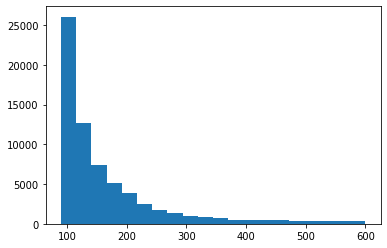

In [58]:
x =minutes.where((minutes>90)&(minutes < 600))
print(x.count())
plt.hist(x, bins =20)
plt.show()

## Outliers
Looking at the pricing for Citi Bike the single pass is for 30 minutes and the annual pass is for 45 minutes. Every minute after is \\$0.23 and \\$0.15 respectively. Meaning most long trips in the data are likely a result of improperly docking or possibly theft. Rides over 90 minutes are considered outliers and removed from the data set.


In [61]:
rides.drop(rides[rides['tripduration_sec']>5400].index, inplace=True)
rides[rides['tripduration_sec']>5400].value_counts()

Series([], dtype: int64)

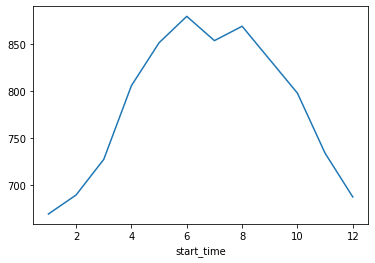

In [60]:
rides['start_time']= pd.to_datetime(rides["start_time"])
mean_time = rides.groupby(rides['start_time'].dt.month)['tripduration_sec'].mean()
mean_time.plot()
plt.show()